# Introduction to GeoPandas

In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Importing an ESRI Shapefile and plotting it using GeoPandas
(and matplotlib [colormaps](https://matplotlib.org/2.0.2/users/colormaps.html))

epsg:4326
epsg:4326


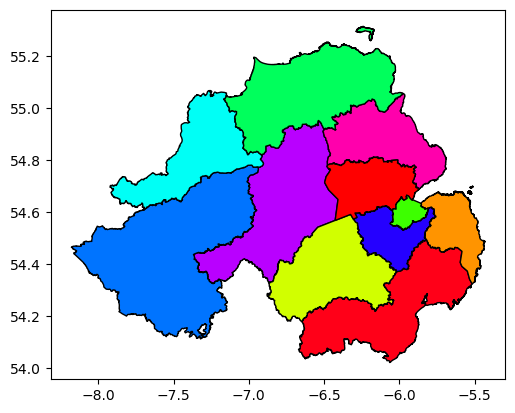

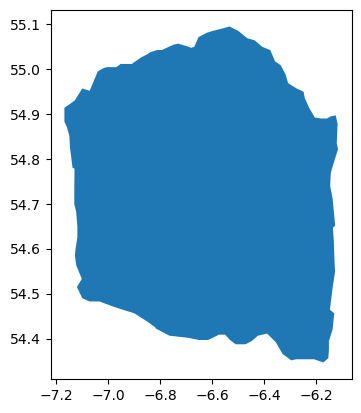

In [52]:
districts = gpd.read_file(r'Shapefiles/districts.shp') # of Northern Ireland
districts.plot(cmap = 'hsv', edgecolor = 'black', column = 'district')

# what is the coordinate reference system?
print(districts.crs)
# EPSG is a "geographic" CRS
# In case of meters we would have a "projected" CRS

area_of_interest = gpd.read_file(r'Shapefiles/area_of_interest.shp')
area_of_interest.plot()
print(area_of_interest.crs)

In [53]:
atms = gpd.read_file(r'Shapefiles/atms.shp')
print(atms.crs)

epsg:4326


## Reprojecting GeoPandas GeoDataFrames

### Plot the figures side by side

<AxesSubplot: >

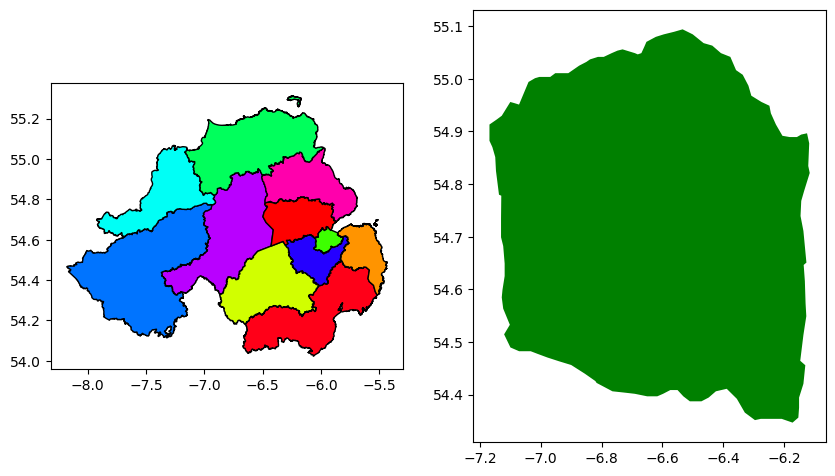

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))
districts.plot(ax = ax1, cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest.plot(ax = ax2, color = 'green')

### Plotting multiple layers

<AxesSubplot: >

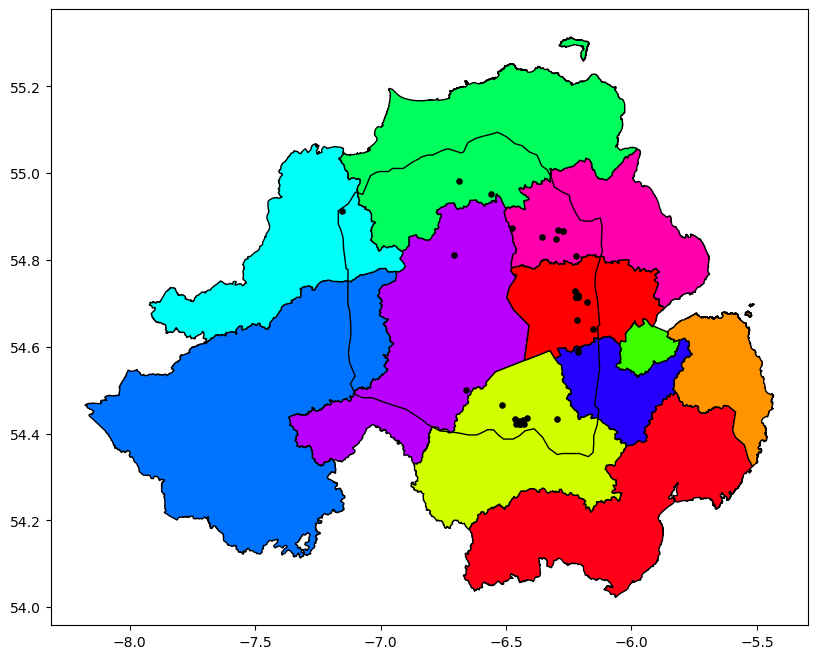

In [55]:
fig, ax = plt.subplots(figsize = (10,8))
districts.plot(ax = ax, cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest.plot(ax = ax, color = 'none', edgecolor = 'black')
atms.plot(ax = ax, color = 'black', markersize = 14)

<AxesSubplot: >

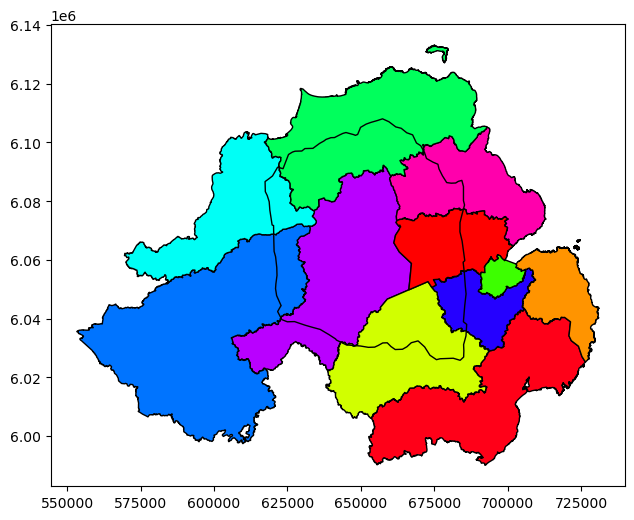

In [33]:
fig, ax = plt.subplots(figsize = (8,6))
districts = districts.to_crs(epsg = 32629)
districts.plot(ax = ax, cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest = area_of_interest.to_crs(epsg = 32629)
area_of_interest.plot(ax = ax, color = 'none', edgecolor = 'black')

## Intersecting Layers

                               district  Id  \
0                            Mid Ulster   0   
1                   Mid and East Antrim   0   
2               Lisburn and Castlereagh   0   
3  Armagh City, Banbridge and Craigavon   0   
4               Antrim and Newtownabbey   0   
5                   Fermanagh and Omagh   0   
6               Derry City and Strabane   0   
7              Causeway Coast and Glens   0   

                                            geometry  
0  POLYGON ((-6.53263 54.94913, -6.53253 54.94901...  
1  POLYGON ((-6.12256 54.80816, -6.12268 54.80817...  
2  POLYGON ((-6.13369 54.43528, -6.13370 54.43528...  
3  MULTIPOLYGON (((-6.27820 54.54965, -6.27819 54...  
4  POLYGON ((-6.16426 54.81062, -6.16405 54.81063...  
5  POLYGON ((-6.99814 54.78009, -6.99806 54.78010...  
6  POLYGON ((-7.09029 54.95438, -7.09029 54.95438...  
7  POLYGON ((-6.32224 54.99264, -6.32226 54.99264...  


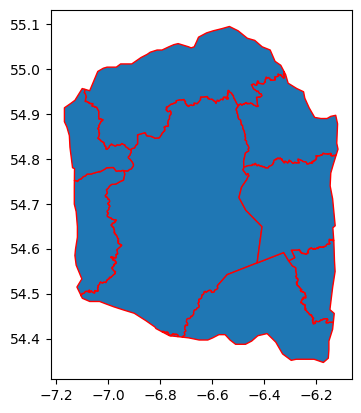

In [56]:
districts_in_aoi = gpd.overlay(districts, area_of_interest, how = 'intersection')
districts_in_aoi.plot(edgecolor = 'red')
print(districts_in_aoi)

## Calculating the areas of the intersected layer 

In [63]:
#districts_in_aoi['area'] = districts_in_aoi.area/1000000
#print(districts_in_aoi)
districts_in_aoi['area'] = districts_in_aoi.to_crs(epsg = 32629).area/1000000
districts_in_aoi

,district,Id,geometry,area
0,Mid Ulster,0,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901...",1574.420527
1,Mid and East Antrim,0,"POLYGON ((-6.12256 54.80816, -6.12268 54.80817...",373.691198
2,Lisburn and Castlereagh,0,"POLYGON ((-6.13369 54.43528, -6.13370 54.43528...",151.737979
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((-6.27820 54.54965, -6.27819 54...",553.933535
4,Antrim and Newtownabbey,0,"POLYGON ((-6.16426 54.81062, -6.16405 54.81063...",462.823196
5,Fermanagh and Omagh,0,"POLYGON ((-6.99814 54.78009, -6.99806 54.78010...",262.996590
6,Derry City and Strabane,0,"POLYGON ((-7.09029 54.95438, -7.09029 54.95438...",187.500942
7,Causeway Coast and Glens,0,"POLYGON ((-6.32224 54.99264, -6.32226 54.99264...",747.580560


## Exporting GeoPandas GeoDataFrames into an ESRI Shapefile

In [60]:
districts_in_aoi.to_file('districts_within_aoi.shp', driver = "ESRI Shapefile")